<a href="https://colab.research.google.com/github/ausaffatima/ocr-text-detection-extraction/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detection and extraction of text from an image using EasyOCR

Installing the required packages

In [1]:
! pip install torch torchvision torchaudio
! pip install easyocr

     |████████████████████████████████| 3.0 MB 5.3 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Importing the necessary libraries

In [2]:
! pip install opencv-python-headless==4.1.2.30
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

Setting the image path

In [3]:
IMAGE_PATH = '/content/stop.jpg'

Extracting the text from the image

In [4]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

[([[3212, 1095], [4315, 1095], [4315, 1648], [3212, 1648]],
  'STOP',
  0.7856055498123169)]

In [5]:
print(result[0][1])

STOP


Showing the detected text in the image

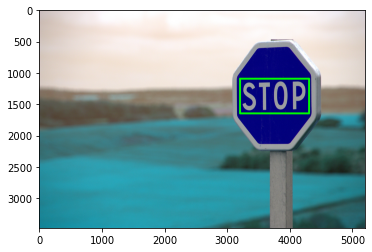

In [6]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),30)
plt.imshow(img)
plt.show()

Another example with multiple lines of text in the image

In [7]:
IMAGE_PATH = '/content/sign.jpg'
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

[([[2667, 1763], [4379, 1763], [4379, 2396], [2667, 2396]],
  'DEAD',
  0.9999365210533142),
 ([[2900, 2612], [4139, 2612], [4139, 3228], [2900, 3228]],
  'END',
  0.9999392961422576)]

In [8]:
print(result[0][1], result[1][1])

DEAD END


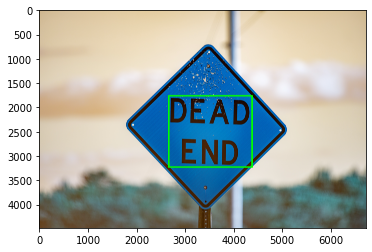

In [9]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
top_left = []
bottom_right = []
for detection in result: 
    top_left.append(tuple(detection[0][0]))
    bottom_right.append(tuple(detection[0][2]))
    #text = detection[1]
    #img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    #img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
x = len(bottom_right) - 1
img = cv2.rectangle(img,top_left[0],(bottom_right[0][0], bottom_right[x][1]),(0, 255, 0),30)
plt.imshow(img)
plt.show()

## Detecting and Extracting text from PDFs

### 1) By converting PDF to images aand using Pytesseract

Mounting google drive

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Installing the required packages

In [11]:
! apt-get install poppler-utils
! pip install pdf2image
! sudo apt install tesseract-ocr
! pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-n

Importing the necessary libraries

In [12]:
from pdf2image import convert_from_path
import pytesseract
from google.colab.patches import cv2_imshow

Converting the PDF into a series of images and saving them in the google drive

In [13]:
pages = convert_from_path('/content/sample.pdf', 500)
count = 0
for page in pages:
    page.save('/content/drive/MyDrive/OCR/images_from_pdf/{}.jpg'.format(count), 'JPEG')
    count = count + 1

Creating a text file to extract the text into

In [14]:
file = open("/content/drive/MyDrive/OCR/recognized.txt", "w+")
file.write("PDF To Text")
file.write("\n")
file.close()

Detecting and extracting text

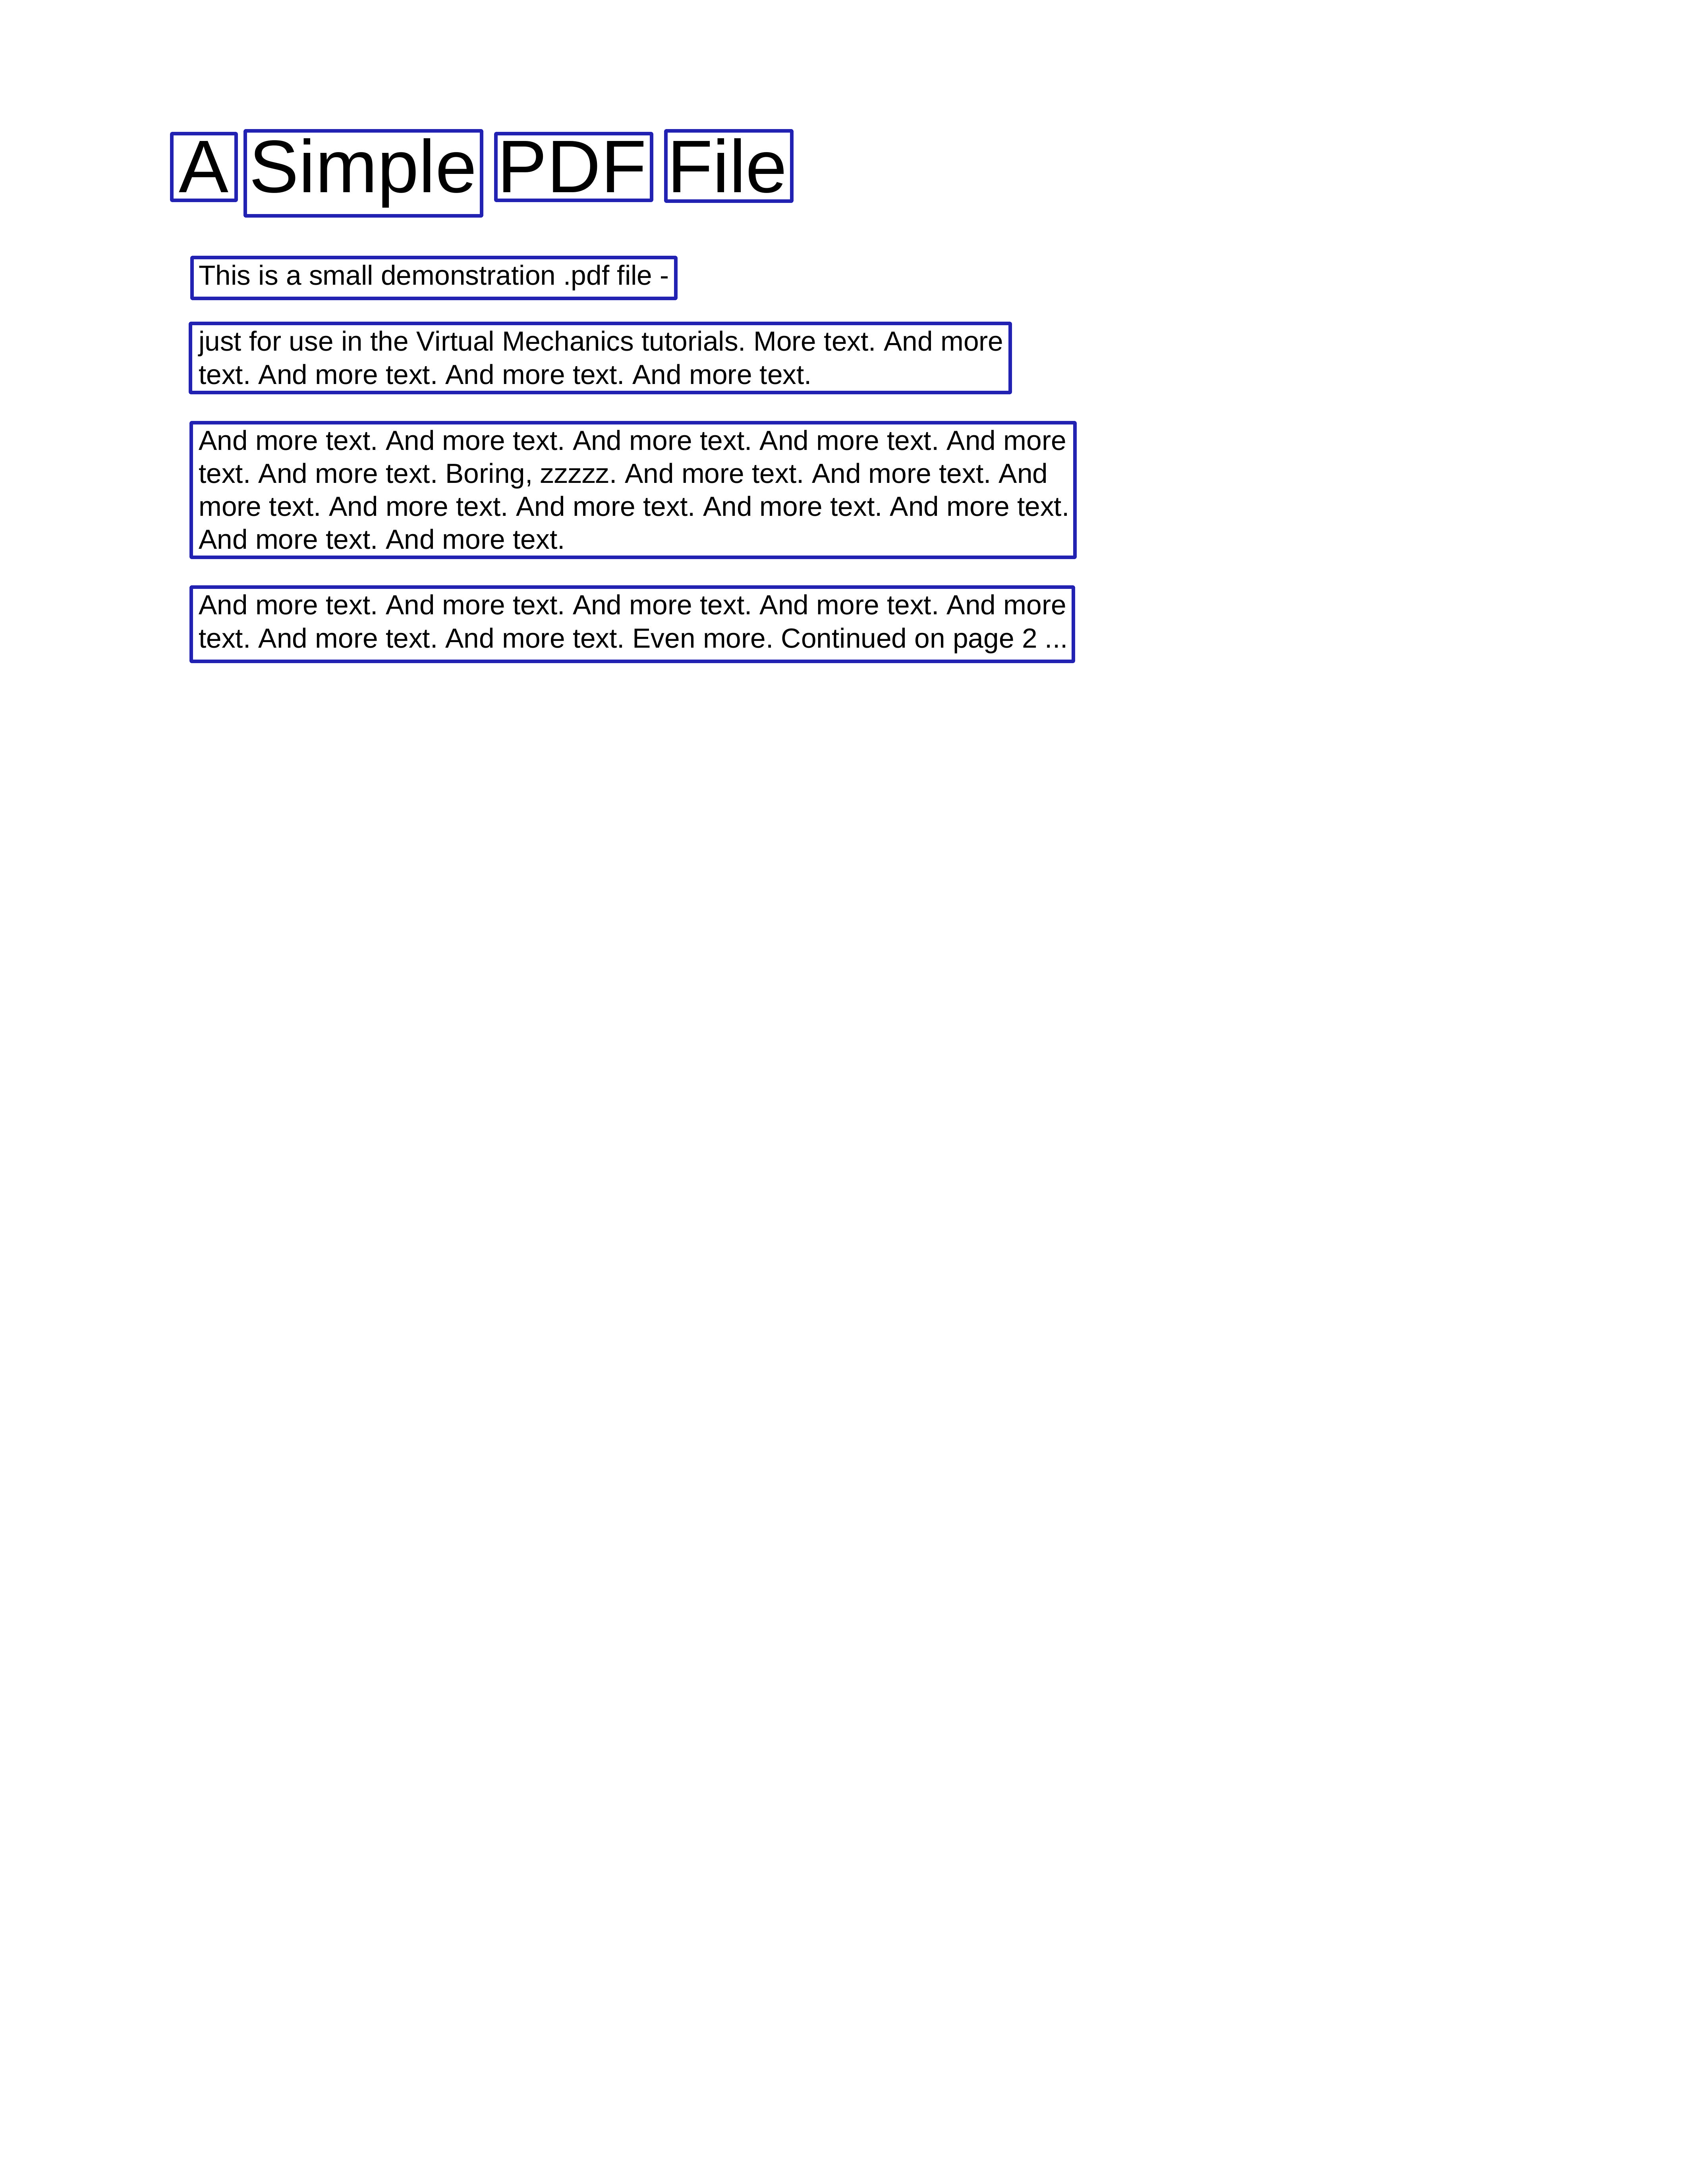

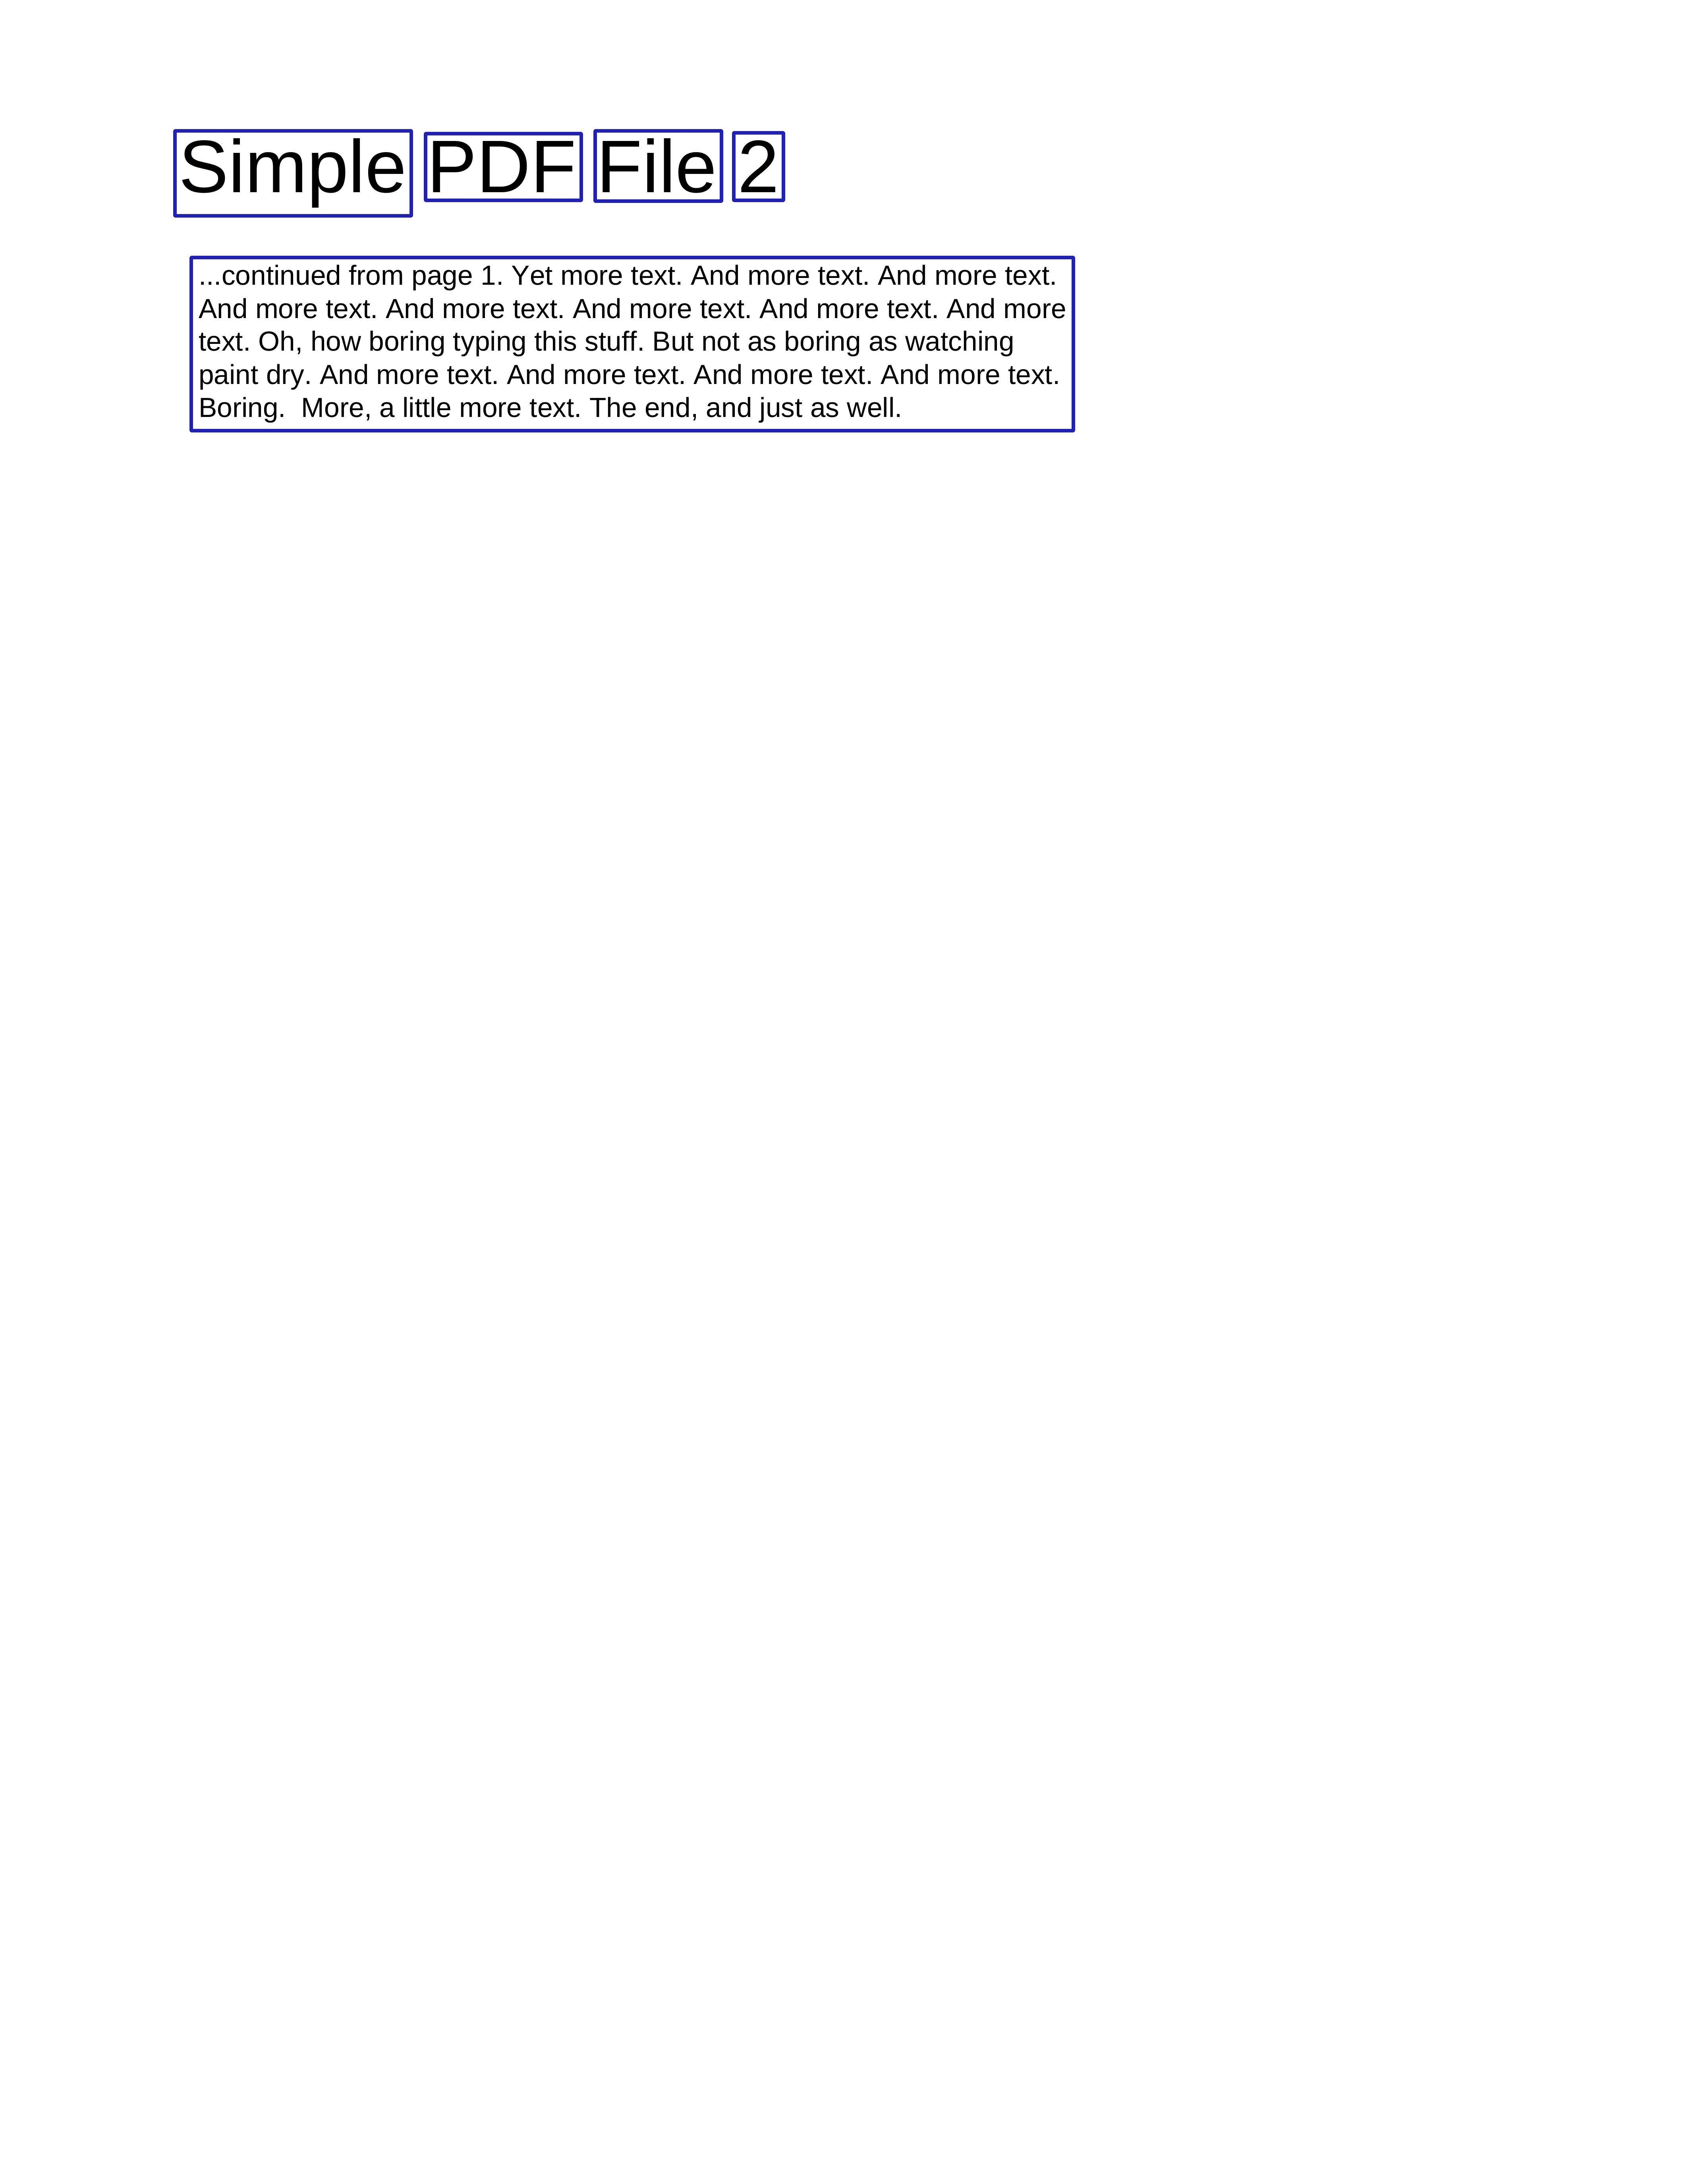

In [15]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

d = 0
for x in range(0, count):
  new_path = '/content/drive/MyDrive/OCR/images_from_pdf/{}.jpg'.format(x)
  
  img = cv2.imread(new_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) # OTSU threshold
  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40)) # structure shape, kernel size
  dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
  contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                  cv2.CHAIN_APPROX_NONE)
 
  im2 = img.copy()
  
  # Looping through the identified contours and extracting text from it into the text file
  file = open("/content/drive/MyDrive/OCR/recognized.txt", "a")
  file.write("----PAGE {}----".format(x+1))

  for cnt in contours:
      x, y, w, h = cv2.boundingRect(cnt)
      
      rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (178, 34, 34), 7)    

      cropped = im2[y:y + h, x:x + w] # Cropping the text box for input to OCR
      
      text = pytesseract.image_to_string(cropped) # Applying OCR
      
      file.write(text)
      file.write("\n")
      
  file.close

  path = '/content/drive/MyDrive/OCR/images_bounding_boxes/%d.png'%d
  cv2.imwrite(path, im2) 
  cv2_imshow(im2)     
  d = d+1

Reading the text from the file into a variable

In [16]:
data_path = '/content/drive/MyDrive/OCR/recognized.txt'
with open(data_path, 'rb') as f:
    lines = f.read().decode('utf-8')

Using nltk to print the text from that variable

In [17]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

string = lines
for sent in sent_tokenize(string):
    print(sent)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
PDF To Text
----PAGE 1----And more text.
And more text.
And more text.
And more text.
And more

 

text.
And more text.
And more text.
Even more.
Continued on page 2...

And more text.
And more text.
And more text.
And more text.
And more
text.
And more text.
Boring, zZzzz.
And more text.
And more text.
And

more text.
And more text.
And more text.
And more text.
And more text.
And more text.
And more text.
just for use in the Virtual Mechanics tutorials.
More text.
And more
text.
And more text.
And more text.
And more text.
This is a small demonstration .pdf file -

PDF


File


The text extracted is not as accurate as we want. In order to improve the accuracy, other methods such as the one given below can also be used.

### 2) Directly from the PDF using PyPDF (in this case no bounding boxes are drawn to show the detection)

Installing and importing the required library

In [18]:
! pip install pdfplumber

  Using cached pdfplumber-0.6.0.tar.gz (46 kB)
  Using cached pdfminer.six-20211012-py3-none-any.whl (5.6 MB)
  Using cached Pillow-9.0.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached Wand-0.6.7-py2.py3-none-any.whl (139 kB)
  Using cached cryptography-36.0.1-cp36-abi3-manylinux_2_24_x86_64.whl (3.6 MB)
  Created wheel for pdfplumber: filename=pdfplumber-0.6.0-py3-none-any.whl size=33688 sha256=95efc9b6e974808bb1c234ba0ef05ad52ab74b334a70fd860c58a58462fb4d2b
  Stored in directory: /root/.cache/pip/wheels/58/56/fe/2e93d842ffa9ea97746c1ab253d43502ed61c0689361a0224e
Successfully built pdfplumber
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
easyocr 1.4.1 requires Pillow<8.3.0, 

In [20]:
import pdfplumber
with pdfplumber.open(r'/content/sample.pdf') as pdf:
    for x in range(len(pdf.pages)):
      page = pdf.pages[x]
      print(page.extract_text())

 A Simple PDF File 
 This is a small demonstration .pdf file - 
 just for use in the Virtual Mechanics tutorials. More text. And more 
 text. And more text. And more text. And more text. 
 And more text. And more text. And more text. And more text. And more 
 text. And more text. Boring, zzzzz. And more text. And more text. And 
 more text. And more text. And more text. And more text. And more text. 
 And more text. And more text. 
 And more text. And more text. And more text. And more text. And more 
 text. And more text. And more text. Even more. Continued on page 2 ...
 Simple PDF File 2 
 ...continued from page 1. Yet more text. And more text. And more text. 
 And more text. And more text. And more text. And more text. And more 
 text. Oh, how boring typing this stuff. But not as boring as watching 
 paint dry. And more text. And more text. And more text. And more text. 
 Boring.  More, a little more text. The end, and just as well. 
